In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer, hamming_loss

# Load the data
file_path_input = r"C:\Users\20223560\OneDrive - TU Eindhoven\Documents\BMT 2e-jaars\advanced programming\group assignment\sorted_tested_molecules.csv"  # replace with your actual file path
data_input = pd.read_csv(file_path_input)

# Separate features and labels
X = data_input.iloc[:, :-2].values  # all rows, all columns except the last two
y = data_input[['PKM2_inhibition', 'ERK2_inhibition']].values  # combine labels into a matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the k-NN model
knn = KNeighborsClassifier()
multi_output_knn = MultiOutputClassifier(knn, n_jobs=-1)

# Determine the best k using GridSearchCV
param_grid = {'estimator__n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(multi_output_knn, param_grid, cv=5, scoring=make_scorer(hamming_loss, greater_is_better=False))
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['estimator__n_neighbors']
print(f"Best value for k: {best_k}")

# Use the best k to define the k-NN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_multi_output_knn = MultiOutputClassifier(best_knn, n_jobs=-1)

# Train the model with the best k
best_multi_output_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_multi_output_knn.predict(X_test)
df_y_pred = pd.DataFrame(y_pred, columns=['Prediction_PKM2_inhibition', 'Prediction_ERK2_inhibition'])

# Calculate accuracy based on both predictions being correct
accuracy_both_correct = np.mean((y_pred == y_test).all(axis=1))

print(f"Accuracy for both PKM2 inhibition and ERK2 inhibition: {accuracy_both_correct:.10f}")
pd.set_option('display.max_rows', None)  # Hiermee wordt het aantal rijen zonder inkorting ingesteld
pd.set_option('display.max_columns', None)


Best value for k: 2
Accuracy for both PKM2 inhibition and ERK2 inhibition: 0.9211469534
     Prediction_PKM2_inhibition  Prediction_ERK2_inhibition
0                             0                           0
1                             0                           0
2                             0                           0
3                             0                           0
4                             0                           0
5                             0                           0
6                             0                           0
7                             0                           0
8                             0                           0
9                             0                           0
10                            0                           0
11                            0                           0
12                            0                           0
13                            0                           0
14          

      PEOE_VSA13  BCUT2D_MRHI  BCUT2D_LOGPLOW  EState_VSA6  SlogP_VSA11  \
0       0.000000     5.553819       -2.047656     6.923737     0.000000   
1       0.000000     6.289504       -1.991714    12.132734     5.749512   
2       0.000000     5.784330       -2.250322    12.152040     0.000000   
3       5.693928     5.705261       -2.432024    24.265468     0.000000   
4       5.559267     6.297760       -2.388420     6.076020     0.000000   
5       5.907180     6.019667       -2.221879    43.445874     0.000000   
6       5.693928     6.000137       -2.273018    14.095344     0.000000   
7       0.000000     7.117986       -2.432847    19.913841     0.000000   
8      11.336921     5.908483       -2.216953    13.847474     0.000000   
9       0.000000     5.740959       -3.162026     4.899910     0.000000   
10      5.907180     6.034866       -2.114268    24.526421     0.000000   
11      0.000000     5.889391       -2.671311     0.000000     0.000000   
12      0.000000     5.78

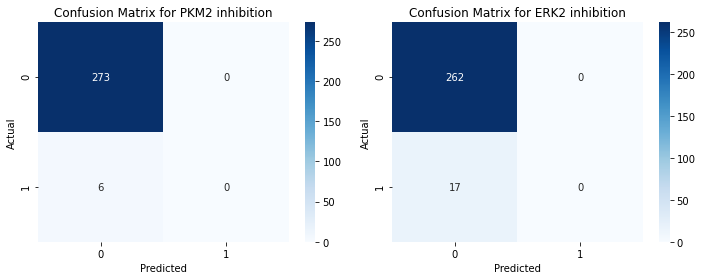

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for PKM2 inhibition
cm_pkm2 = confusion_matrix(y_test[:, 0], y_pred[:, 0])
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_pkm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for PKM2 inhibition')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix for ERK2 inhibition
cm_erk2 = confusion_matrix(y_test[:, 1], y_pred[:, 1])
plt.subplot(1, 2, 2)
sns.heatmap(cm_erk2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ERK2 inhibition')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()